# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
calls = pd.read_csv('datasets/megaline_calls.csv')
internet = pd.read_csv('datasets/megaline_internet.csv')
messages = pd.read_csv('datasets/megaline_messages.csv')
plans = pd.read_csv('datasets/megaline_plans.csv')
users = pd.read_csv('datasets/megaline_users.csv')

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Ao analisar o DataFrame `plans` pude perceber que temos apenas 2 planos disponíveis, o plano `surf` e o plano `ultimate`. Um problema encontrado foi o nome da coluna `'usd_monthly_pay'`, que segundo o dicionário de dados deveria se chamar `'usd_monthly_fee'`. Além disso, vou converter as colunas `'usd_monthly_pay'` e `'usd_per_gb'` para float, apenas para manter o padrão de colunas com valor monetário em float.

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
plans = plans.rename(columns={
    'usd_monthly_pay':'usd_monthly_fee'
})

In [6]:
plans['usd_monthly_fee'] = plans['usd_monthly_fee'].astype('float')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')

In [7]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Posso criar uma nova coluna baseada em `'mb_per_month_included'`, que mostra quantos mb pode ser utilizado no plano, já que logo depois temos a coluna `'usd_per_gb'`, que cobra a quantidade de dados que se pode utilizar no plano em gb, revelando uma incompatibilidade de unidade. Ela vai se chamar `'gb_per_month_included'`.

In [8]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024.0

plans_cols = list(plans.columns)
plans_cols.remove('gb_per_month_included')
plans_cols.insert(2, 'gb_per_month_included')
plans = plans[plans_cols]

In [9]:
plans.head()

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate


## Usuários

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Imprima uma amostra de dados dos usuários
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
68,1068,Marcel,Jimenez,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,NaN
182,1182,Jeff,Burt,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-05-29,surf,NaN
400,1400,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-08,surf,NaN
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN
111,1111,Booker,Hahn,75,"Urban Honolulu, HI MSA",2018-09-17,surf,NaN
416,1416,Deja,Moss,25,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-10-03,surf,2018-11-21
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaN
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaN
283,1283,Alan,Burgess,38,"Charleston-North Charleston, SC MSA",2018-06-16,ultimate,NaN
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Aparentemente, só devo converter as colunas `'reg_date'` `'churn_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [12]:
users['reg_date'] = pd.to_datetime(
    users['reg_date'],
    format='%Y-%m-%d'
)

users['churn_date'] = pd.to_datetime(
    users['churn_date'],
    format='%Y-%m-%d'
)

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Vou criar a coluna `'year_month'` para facilitar meus cálculos e análises futuras.

In [14]:
users['year_month'] = users['reg_date'].dt.to_period('M')

In [15]:
users.info()
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   year_month  500 non-null    period[M]     
dtypes: datetime64[ns](2), int64(2), object(4), period[M](1)
memory usage: 35.3+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year_month
130,1130,Clarence,Cunningham,27,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-05-17,surf,NaT,2018-05
99,1099,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-26,surf,NaT,2018-02
244,1244,Demarcus,Ellis,75,"Birmingham-Hoover, AL MSA",2018-02-05,surf,NaT,2018-02
386,1386,Jeni,Gilbert,30,"Seattle-Tacoma-Bellevue, WA MSA",2018-04-11,surf,NaT,2018-04
11,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaT,2018-01


## Chamadas

In [16]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprima uma amostra de dados das chamadas
calls.sample(10)

,id,user_id,call_date,duration
40902,1151_80,1151,2018-12-31,11.16
62637,1226_36,1226,2018-07-14,11.18
82584,1299_242,1299,2018-09-09,10.76
136975,1496_144,1496,2018-12-12,5.26
764,1004_268,1004,2018-12-18,26.37
40722,1150_462,1150,2018-11-14,11.16
95561,1338_384,1338,2018-11-14,13.10
22236,1082_198,1082,2018-06-24,4.88
62833,1226_232,1226,2018-09-15,15.56
46772,1170_523,1170,2018-11-01,7.58


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Vou converter a coluna `'call_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [18]:
calls['call_date'] = pd.to_datetime(
    calls['call_date'],
    format='%Y-%m-%d'
)

In [19]:
calls.info()
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
132206,1476_143,1476,2018-09-26,14.25
9157,1042_83,1042,2018-12-06,11.81
6622,1031_343,1031,2018-07-22,9.38
82651,1299_309,1299,2018-11-12,0.00
58774,1212_274,1212,2018-10-04,18.16
49263,1178_294,1178,2018-10-15,16.93
38933,1145_180,1145,2018-06-18,1.97
22880,1083_183,1083,2018-12-11,7.37
122580,1433_151,1433,2018-11-01,6.60
60886,1220_261,1220,2018-07-17,0.00


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Também vou criar a coluna `'year_month'` nesse DataFrame para facilitar meus cálculos e análises futuras.

In [20]:
calls['year_month'] = calls['call_date'].dt.to_period('M')

In [21]:
calls.info()
calls.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   year_month  137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


,id,user_id,call_date,duration,year_month
127261,1456_8,1456,2018-07-16,9.06,2018-07
60128,1216_113,1216,2018-12-12,4.96,2018-12
11842,1052_61,1052,2018-12-15,8.64,2018-12
18539,1071_345,1071,2018-08-04,7.69,2018-08
68347,1246_366,1246,2018-05-06,6.09,2018-05


## Mensagens

In [22]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Imprima uma amostra dos dados das mensagens
messages.sample(10)

,id,user_id,message_date
65829,1425_77,1425,2018-11-19
679,1006_739,1006,2018-12-09
37718,1249_269,1249,2018-10-04
29029,1177_15,1177,2018-12-13
74527,1478_55,1478,2018-09-24
12884,1084_124,1084,2018-12-01
5126,1046_188,1046,2018-09-22
11267,1077_538,1077,2018-07-01
29834,1183_229,1183,2018-10-22
53651,1340_177,1340,2018-09-28


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Vou converter a coluna `'message_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [24]:
messages['message_date'] = pd.to_datetime(
    messages['message_date'],
    format='%Y-%m-%d'
)

In [25]:
messages.info()
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
121,1001_232,1001,2018-10-26
59544,1379_21,1379,2018-12-28
74800,1484_420,1484,2018-11-30
7047,1057_371,1057,2018-11-16
50996,1331_171,1331,2018-08-30
61681,1385_145,1385,2018-09-29
1798,1017_150,1017,2018-11-14
44350,1294_131,1294,2018-10-09
7832,1060_168,1060,2018-11-26
37568,1249_25,1249,2018-08-29


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Aqui novamente vou criar a coluna `'year_month'` para facilitar meus cálculos e análises futuras.

In [26]:
messages['year_month'] = messages['message_date'].dt.to_period('M')

In [27]:
messages.info()
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year_month    76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


,id,user_id,message_date,year_month
49866,1328_824,1328,2018-05-26,2018-05
75741,1492_87,1492,2018-10-20,2018-10
24101,1144_609,1144,2018-10-16,2018-10
64252,1408_377,1408,2018-11-24,2018-11
42439,1278_89,1278,2018-11-14,2018-11


## Internet

In [28]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
#  Imprima uma amostra de dados para o tráfego da internet
internet.sample(10)

,id,user_id,session_date,mb_used
4471,1028_21,1028,2018-05-18,203.42
91841,1425_235,1425,2018-11-29,248.68
74736,1352_122,1352,2018-09-26,361.45
31203,1142_214,1142,2018-12-13,284.00
96649,1454_105,1454,2018-10-21,371.22
3860,1022_271,1022,2018-05-22,1020.41
87061,1403_409,1403,2018-08-26,669.66
87185,1404_52,1404,2018-08-05,622.84
74433,1350_7,1350,2018-11-26,0.00
55634,1251_445,1251,2018-03-22,257.14


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Vou converter a coluna `'session_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [30]:
internet['session_date'] = pd.to_datetime(
    internet['session_date'],
    format='%Y-%m-%d'
)

In [31]:
internet.info()
internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
5079,1028_657,1028,2018-06-05,271.24
19984,1090_218,1090,2018-11-16,0.00
89277,1411_181,1411,2018-09-07,180.07
29197,1133_257,1133,2018-12-08,141.99
17681,1080_12,1080,2018-12-19,481.41
104341,1498_414,1498,2018-09-04,174.44
74614,1351_100,1351,2018-12-26,66.97
95192,1444_143,1444,2018-10-17,829.80
75871,1357_222,1357,2018-09-22,842.52
61999,1282_116,1282,2018-11-08,658.71


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Mais uma vez irei criar a coluna `'year_month'` para facilitar meus cálculos e análises futuras. Além disso, assim como na tabela `plans`, vou criar uma coluna `'gb_used'` para manter o padrão de cobrança em gb.

In [32]:
internet['gb_used'] = internet['mb_used'] / 1024.0

In [33]:
internet['year_month'] = internet['session_date'].dt.to_period('M')

In [34]:
internet.info()
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   year_month    104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), period[M](1)
memory usage: 4.8+ MB


,id,user_id,session_date,mb_used,gb_used,year_month
16638,1075_71,1075,2018-09-08,0.00,0.000000,2018-09
45494,1201_360,1201,2018-10-12,852.93,0.832939,2018-10
42261,1187_438,1187,2018-12-29,506.37,0.494502,2018-12
48931,1219_41,1219,2018-12-24,0.00,0.000000,2018-12
12652,1061_149,1061,2018-12-26,717.10,0.700293,2018-12


## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [35]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
plans

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [36]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

calls_per_month = calls.groupby(['user_id', 'year_month']).size().reset_index(name='calls_count')

In [37]:
calls_per_month

,user_id,year_month,calls_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [38]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

minutes_per_month = calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index(name='minutes_count')

In [39]:
minutes_per_month

,user_id,year_month,minutes_count
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2253,1498,2018-12,324.77
2254,1499,2018-09,330.37
2255,1499,2018-10,363.28
2256,1499,2018-11,288.56


In [40]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

messages_per_month = messages.groupby(['user_id', 'year_month']).size().reset_index(name='messages_count')

In [41]:
messages_per_month

,user_id,year_month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [42]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

gb_used_per_month = internet.groupby(['user_id', 'year_month'])['gb_used'].sum().reset_index(name='gb_sum')

In [43]:
gb_used_per_month

,user_id,year_month,gb_sum
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605
...,...,...,...
2272,1498,2018-12,22.595400
2273,1499,2018-09,12.680430
2274,1499,2018-10,19.035576
2275,1499,2018-11,16.419756


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [44]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

merged_df = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'year_month'], how='outer')
merged_df = merged_df.merge(messages_per_month, on=['user_id', 'year_month'], how='outer')
merged_df = merged_df.merge(gb_used_per_month, on=['user_id', 'year_month'], how='outer')
merged_df = merged_df.fillna(0)

In [45]:
merged_df

,user_id,year_month,calls_count,minutes_count,messages_count,gb_sum
0,1000,2018-12,16.0,116.83,11.0,1.856904
1,1001,2018-08,27.0,171.14,30.0,6.756982
2,1001,2018-09,49.0,297.69,44.0,13.002754
3,1001,2018-10,65.0,374.11,53.0,21.807119
4,1001,2018-11,64.0,404.59,36.0,18.070605
...,...,...,...,...,...,...
2288,1498,2018-12,39.0,324.77,0.0,22.595400
2289,1499,2018-09,41.0,330.37,0.0,12.680430
2290,1499,2018-10,53.0,363.28,0.0,19.035576
2291,1499,2018-11,45.0,288.56,0.0,16.419756


In [46]:
# Adicione as informações sobre o plano

merged_df = merged_df.merge(users.drop(columns=['year_month']), on='user_id', how='left')

In [47]:
merged_df = merged_df.merge(plans, left_on='plan', right_on='plan_name', how='left')

In [48]:
merged_df.head()

,user_id,year_month,calls_count,minutes_count,messages_count,gb_sum,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate
1,1001,2018-08,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
2,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
3,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
4,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [49]:
# Calcule a receita mensal para cada usuário
def calculate_revenue(row):
    revenue = row['usd_monthly_fee']
    
    if row['minutes_count'] > row['minutes_included']:
        revenue += (row['minutes_count'] - row['minutes_included']) * row['usd_per_minute']

    if row['messages_count'] > row['messages_included']:
        revenue += (row['messages_count'] - row['messages_included']) * row['usd_per_message']

    if row['gb_sum'] > row['gb_per_month_included']:
        revenue += (row['gb_sum'] - row['gb_per_month_included']) * row['usd_per_gb']

    return revenue

In [50]:
merged_df['revenue'] = merged_df.apply(calculate_revenue, axis=1)

In [51]:
merged_df.head()

,user_id,year_month,calls_count,minutes_count,messages_count,gb_sum,first_name,last_name,age,city,...,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate,70.000000
1,1001,2018-08,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,20.000000
2,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,20.000000
3,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,88.161191
4,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,50.706055


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

C:\Users\joaod\AppData\Local\Temp\ipykernel_10228\1542541639.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


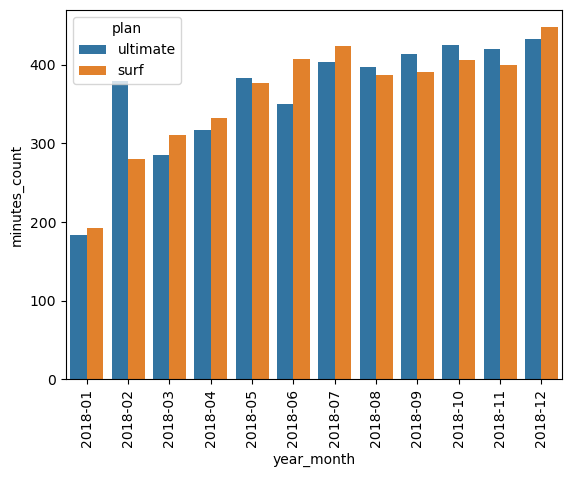

In [52]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='minutes_count',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

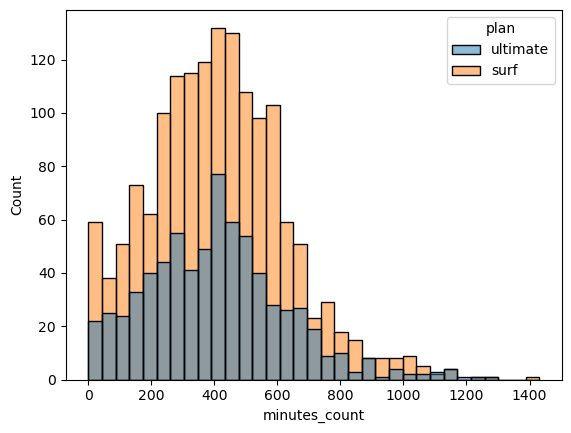

In [53]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

sns.histplot(
    data=merged_df[merged_df['minutes_count'] > 0],
    x='minutes_count',
    hue='plan'
)

plt.show()

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [54]:
# Calcule a média e a variância da duração mensal das chamadas

merged_df.groupby(['plan', 'year_month'])['minutes_count'].agg({'mean', 'var', 'std'})

var        mean         std
plan     year_month                                      
surf     2018-01     14795.440200  192.840000  121.636508
         2018-02     46959.219961  280.851111  216.700761
         2018-03     31821.317991  310.970000  178.385308
         2018-04     45615.666796  332.380000  213.578245
         2018-05     53282.922217  377.053247  230.830939
         2018-06     40758.661193  407.208866  201.887744
         2018-07     54434.184064  424.523223  233.311346
         2018-08     48616.061790  387.169630  220.490503
         2018-09     41580.494645  390.992062  203.912959
         2018-10     46731.430317  405.692363  216.174537
         2018-11     46105.085924  399.599823  214.720949
         2018-12     56983.247423  447.475283  238.711641
ultimate 2018-01     14991.369958  183.162500  122.439250
         2018-02     68540.288348  379.861429  261.802002
         2018-03     54273.917252  285.701667  232.967631
         2018-04     31057.727496  316.508095  176.232027
         2018-05     39290.610940  383.664828  198.218594
         2018-06     37923.360514  349.811064  194.739212
         2018-07     64844.426958  403.767288  254.645689
         2018-08     47680.189425  397.274789  218.357939
         2018-09     50994.505514  413.287326  225.819630
         2018-10     48371.222127  425.168019  219.934586
         2018-11     54265.152604  420.477559  232.948820
         2018-12     55781.717507  433.012583  236.181535

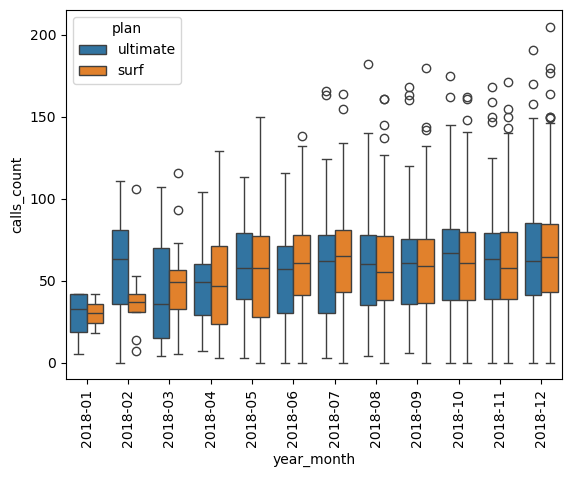

In [55]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

sns.boxplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='calls_count',
    hue='plan'
)

plt.xticks(rotation=90)
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

Pelo que pudemos perceber no primeiro gráfico, a média de chamadas para cada plano é bem próxima, com exceção de fevereiro, onde o plano `ultimate` fica bem à frente do plano `surf`. Nos demais meses, o plano `surf` fica à frente, liderando em 6 dos outros 11 meses. 

No segundo gráfico, fica claro que há muito mais usuários que assinam o plano `surf` do que o plano `ultimate`. A média de minutos gastos por mês em ambos os planos fica em torno dos 400 minutos.

Com todas as informações que foram coletadas, pude concluir que, em média, o comportamento em ambos os planos é bem parecido, exceto no mês de fevereiro, onde o plano `ultimate` fica bem à frente.

### Mensagens

C:\Users\joaod\AppData\Local\Temp\ipykernel_10228\1337410330.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


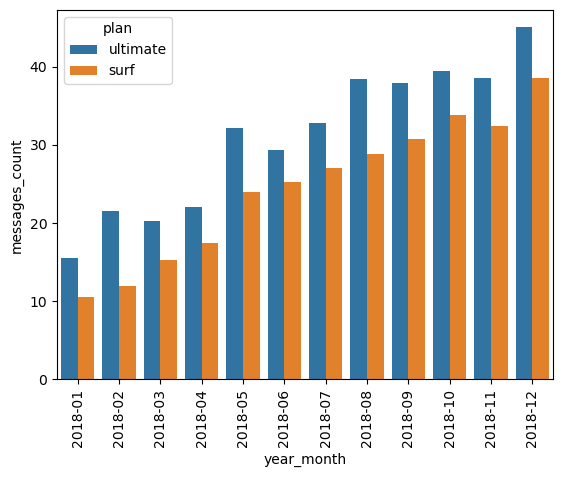

In [56]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='messages_count',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

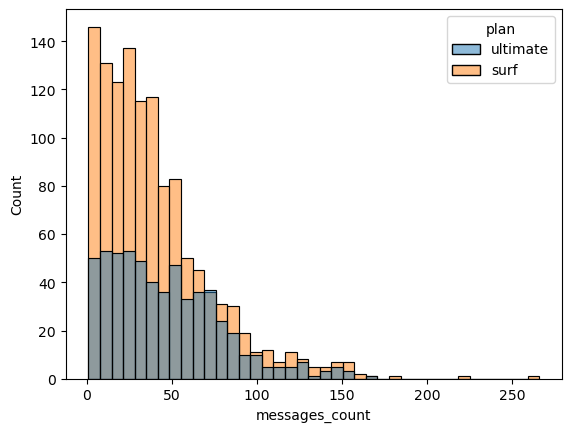

In [57]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

sns.histplot(
    data=merged_df[merged_df['messages_count'] > 0],
    x='messages_count',
    hue='plan'
)

plt.show()

In [58]:
merged_df.groupby(['plan', 'year_month'])['messages_count'].agg({'mean', 'var', 'std'})

var       mean        std
plan     year_month                                   
surf     2018-01      220.500000  10.500000  14.849242
         2018-02      386.000000  12.000000  19.646883
         2018-03      346.565217  15.260870  18.616262
         2018-04      501.591837  17.400000  22.396246
         2018-05      847.197198  24.012987  29.106652
         2018-06      914.920103  25.298969  30.247646
         2018-07      923.915565  27.033058  30.395979
         2018-08     1029.515528  28.777778  32.086064
         2018-09     1003.829496  30.762887  31.683268
         2018-10     1275.465708  33.839662  35.713663
         2018-11     1065.344034  32.385159  32.639608
         2018-12     1458.158612  38.600629  38.185843
ultimate 2018-01      313.666667  15.500000  17.710637
         2018-02      478.285714  21.571429  21.869744
         2018-03      654.386364  20.250000  25.580977
         2018-04      544.147619  22.047619  23.326972
         2018-05     1297.310345  32.103448  36.018195
         2018-06      857.620722  29.340426  29.285162
         2018-07      960.488019  32.830508  30.991741
         2018-08     1196.367404  38.478873  34.588544
         2018-09     1050.918331  37.895349  32.417871
         2018-10     1221.106289  39.443396  34.944331
         2018-11     1232.669166  38.606299  35.109389
         2018-12     1549.419956  45.006623  39.362672

[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

Conforme observado no primeiro gráfico, o volume médio de mensagens enviadas pelos usuários no plano `ultimate` é superior durante todo o ano.

Já no segundo gráfico, é possível observar que  quantidade de mansagens mensais para cada plano fica em torno de 0 a 28. Apesar de o plano `ultimate` ter um limite de 1000 mensagens mensais, a grande maioria não passa de 100 mensagens, enquanto no plano `surf`, como o limite é 50, podemos ver que a maioria fica atrás desse limite.

Com base nas informações coletadas, podemos assumir que o volume de mensagens não difere muito entre os planos, mesmo com o limite sendo 20x maior no plano `ultimate`. No plano `surf` os primeiros 4 meses ficam atrás em relação à média, que se mantém aproximadamente entre 35 e 40 mensagens durante os 8 meses restantes. Já no plano `ultimate`, assim como no plano surf, a média dos 4 primeiros meses ficam atrás, e nos outros 8 meses fica em torno de 30 a 45 mensagens.

### Internet

C:\Users\joaod\AppData\Local\Temp\ipykernel_10228\3620821173.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


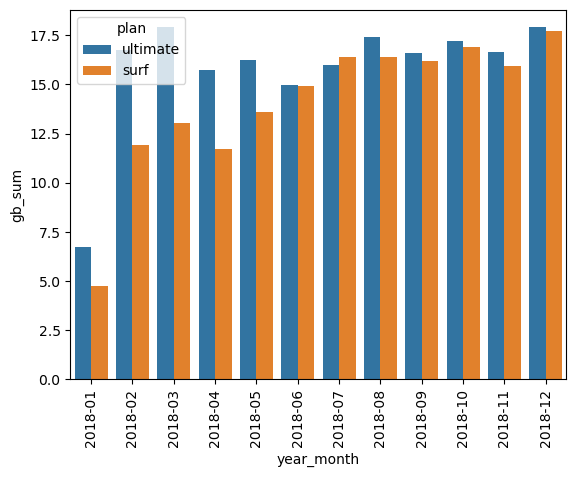

In [59]:
sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='gb_sum',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

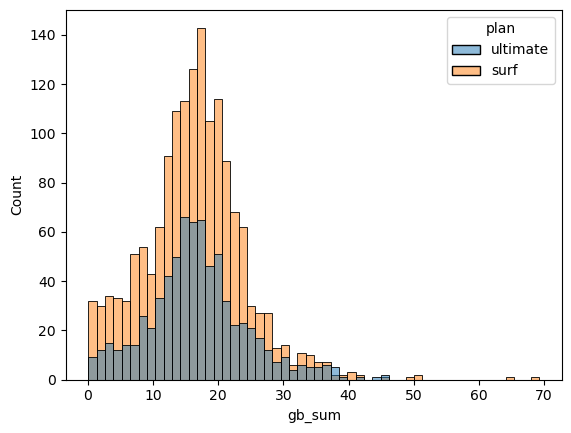

In [60]:
sns.histplot(
    data=merged_df[merged_df['gb_sum'] > 0],
    x='gb_sum',
    hue='plan'
)

plt.show()

In [61]:
merged_df.groupby(['plan', 'year_month'])['gb_sum'].agg({'mean', 'var', 'std'})

var       mean        std
plan     year_month                                  
surf     2018-01      17.394976   4.760605   4.170728
         2018-02      41.649779  11.893402   6.453664
         2018-03      65.084035  13.032656   8.067468
         2018-04      56.309643  11.703323   7.503975
         2018-05      58.628592  13.609722   7.656931
         2018-06      46.857252  14.942900   6.845236
         2018-07      61.689899  16.390235   7.854292
         2018-08      71.178902  16.401691   8.436759
         2018-09      48.939371  16.202570   6.995668
         2018-10      59.631291  16.905601   7.722130
         2018-11      54.526776  15.956303   7.384225
         2018-12      68.805130  17.707490   8.294886
ultimate 2018-01      15.635216   6.755950   3.954139
         2018-02      35.904976  16.727352   5.992076
         2018-03     133.837858  17.892108  11.568831
         2018-04      84.332091  15.743803   9.183251
         2018-05      54.159275  16.234846   7.359299
         2018-06      68.678409  14.978439   8.287244
         2018-07      65.249644  15.961664   8.077725
         2018-08      57.646831  17.397188   7.592551
         2018-09      47.053374  16.572138   6.859546
         2018-10      54.354932  17.199759   7.372580
         2018-11      54.921606  16.634458   7.410911
         2018-12      59.014608  17.893742   7.682097

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

No primeiro gráfico, é possível ver que o plano `ultimate` fica à frente em tráfego de internet em todos os meses, exceto por julho, onde o plano `surf` fica à frente por muito pouco. O comportamento difere bem nos primeiros 5 meses, com o plano `ultimate` ficando bem à frente, o que muda nos outros meses, onde a margem de diferença das médias de tráfego de internet por mês se aproximam entre os dois planos.

No segundo gráfico, vemos que, no geral, o gasto de internet é bem similar, mas em média os usuários do plano `surf` gastam mais internet, com sua média mais próximo de 17gb gastos, o que é um número interessante, já que o limite mensal é 15gb para o plano `surf`. Isso nos mostra que os usuários costumam passar do limite de tráfego de internet nesse plano. Já no plano `ultimate`, a média fica em torno de 14, 15gb. Isso nos diz que, mesmo que o plano `ultimate` tenha o dobro de tráfego disponível mensalmente, os usuários gastam menos no que no plano `surf`.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

C:\Users\joaod\AppData\Local\Temp\ipykernel_10228\2530186070.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


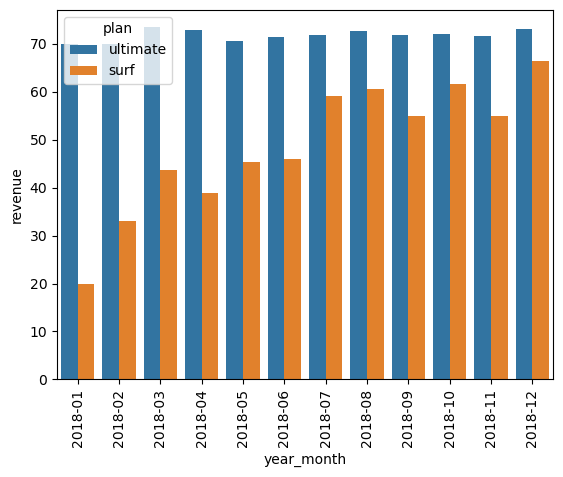

In [62]:
sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='revenue',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

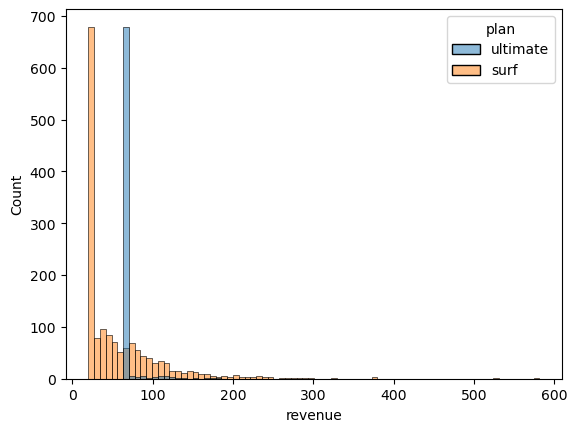

In [63]:
sns.histplot(
    data=merged_df[merged_df['revenue'] > 0],
    x='revenue',
    hue='plan'
)

plt.show()

In [64]:
revenue_stats = merged_df.groupby(['plan', 'year_month'])['revenue'].agg({'mean', 'var', 'std'})
revenue_stats

var       mean        std
plan     year_month                                   
surf     2018-01        0.000000  20.000000   0.000000
         2018-02      373.848278  33.003956  19.335157
         2018-03     1398.510062  43.578788  37.396658
         2018-04     1091.750583  38.777485  33.041649
         2018-05     1800.862961  45.346471  42.436576
         2018-06     1823.758558  45.920653  42.705486
         2018-07     2780.794131  59.171272  52.733236
         2018-08     3422.047181  60.650127  58.498266
         2018-09     2096.562909  54.923685  45.788240
         2018-10     2984.756428  61.646473  54.632924
         2018-11     2330.530450  54.932077  48.275568
         2018-12     4417.907220  66.360652  66.467339
ultimate 2018-01        0.000000  70.000000   0.000000
         2018-02        0.000000  70.000000   0.000000
         2018-03      109.470151  73.392448  10.462798
         2018-04      112.851784  72.771377  10.623172
         2018-05        7.713035  70.515720   2.777235
         2018-06       59.193076  71.476980   7.693704
         2018-07       99.291160  71.850414   9.964495
         2018-08      136.945993  72.680102  11.702393
         2018-09       61.174210  71.812310   7.821394
         2018-10      151.655768  72.091689  12.314860
         2018-11       85.865043  71.601204   9.266339
         2018-12      195.486819  73.045714  13.981660

[Formule conclusões sobre como a receita difere entre os planos.]

No primeiro gráfico podemos observar que, devido à diferença de preço entre os planos (20 dólares para o plano `surf` e 70 dólares para o plano `ultimate`, então uma diferença de 50 dólares), o plano `ultimate` gera mais receita para a empresa, mesmo com bem menos usuários assinando esse plano.

Já no segundo gráfico, é possível ver que os usuários do plano `surf` ultrapassam bem mais o limite mensal, o que era de se esperar, já que o plano `ultimate` fornece bem mais benefícios.

Observando as médias, podemos concluir que os usuários do plano `surf` ultrapassam o limite mensal regularmente, o que se justifica pelo fato das médias mensais da receita dos usuários desse plano estarem todas acima de 30. Já a média da receita dos usuários do plano `ultimate` permanecem por volta dos 70 a 73, o que era de se esperar devido aos benefícios que são providos por esse plano.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

Aqui a hipótese nula é de que a receita média dos usuários dos planos `surf` e `ultimate` são iguais. Nossa hipótese alternativa é de que a receita média dos usuários dos planos `surf` e `ultimate` diferem. Vamos usar um valor alfa (limiar) de 5%:

In [65]:
# Teste as hipóteses

sample_1 = merged_df[merged_df['plan'] == 'ultimate']['revenue']
sample_2 = merged_df[merged_df['plan'] == 'surf']['revenue']

In [66]:
sample_1.var(), sample_2.var()

(115.9680805821281, 2887.544971039368)

In [67]:
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')

valor-p:  4.881852673479799e-25
Rejeitamos a hipótese nula.


Baseado no teste de hipótese que acabamos de fazer, podemos afirmar que rejeitamos a hipótese nula, o que nos diz que é muito improvável que as receitas médias dos planos `surf` e `ultimate` sejam iguais. Provavelmente há uma diferença real entre elas.

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

Aqui a hipótese nula é de que a receita média dos usuários da área de NY-NJ é igual à dos usuários das demais regiões. Nossa hipótese alternativa é de que a receita média dos usuários da área de NY-NJ e dos usuários das demais regiões diferem. Vamos usar um valor alfa (limiar) de 5%:

In [68]:
# Teste as hipóteses

merged_df['is_nynj'] = merged_df['city'].str.contains('NY-NJ')

In [69]:
sample_1 = merged_df[merged_df['is_nynj'] == True]['revenue']
sample_2 = merged_df[merged_df['is_nynj'] == False]['revenue']

In [70]:
sample_1.var(), sample_2.var()

(1777.752923296623, 2116.1719888966886)

In [71]:
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')

valor-p:  0.018609472974972074
Rejeitamos a hipótese nula.


Fizemos o teste de hipótese e, baseado nele, podemos afirmar que rejeitamos a hipótese nula. Isso significa que provavelmente a média das receitas dos usuários da área de NY-NJ difere das demais.

## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

Esse projeto foi bem interessante. A análise dos dados dos planos `surf` e `ultimate` da Megaline revelou diferenças relevantes no comportamento dos usuários e na geração de receita.

Em termos de chamadas e mensagens, o uso médio mensal foi semelhante entre os planos, com variações pontuais. O plano `ultimate` apresentou maior envio de mensagens ao longo do ano, mas poucos usuários chegaram perto dos limites disponíveis em qualquer um dos planos.

No tráfego de internet, os usuários do plano `surf` frequentemente ultrapassam a franquia de 15 GB, com média mensal próxima de 17 GB. Já os usuários do `ultimate`, que possuem 30 GB disponíveis, consomem em média 14 a 15 GB, o que indica menos cobrança por excedente.

Apesar de o `ultimate` ter menos usuários, sua alta mensalidade garante uma receita média maior. Por outro lado, o `surf`, com muito mais usuários, gera receita extra principalmente pelo uso de dados acima do limite.

O teste de hipótese confirmou que a diferença entre as receitas médias dos dois planos é estatisticamente significativa. Isso indica que a escolha do plano impacta diretamente na receita gerada, e que o `ultimate` gera mais receita por usuário, enquanto o `surf` compensa em volume de assinantes e uso excedente.

Com base nas análises e testes realizados, podemos concluir que o plano `ultimate` gera mais receita por usuário, principalmente devido ao valor da assinatura. No entanto, o plano `surf` apresenta maior volume de usuários e frequentemente gera receita adicional por excedente, especialmente no uso de dados. Ambos os planos têm comportamentos parecidos no uso de chamadas e mensagens, mas o consumo de internet e a estratégia de precificação são os principais fatores de diferenciação em termos de receita.